In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
beer = pd.read_csv('data/recipeData.csv', index_col='BeerID', encoding='latin1')

In [3]:
beer.shape

(73861, 21)

In [4]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [5]:
stylecounts = pd.DataFrame(beer['Style'].value_counts().reset_index())
stylecounts.loc[stylecounts['Style']>400,:]


,index,Style
0,American IPA,11940
1,American Pale Ale,7581
2,Saison,2617
3,American Light Lager,2277
4,American Amber Ale,2038
5,Blonde Ale,1753
6,Imperial IPA,1478
7,American Stout,1268
8,Irish Red Ale,1204
9,American Brown Ale,1152


In [6]:
#a = beer['Imperial IPA'] = (beer['Style'].str.contains('Imperial IPA'or'Double IPA'))*'Imperial IPA '


In [7]:
#b = beer['Black IPA'] = (beer['Style'].str.contains('Black IPA'))*'Black IPA '

In [8]:
#v = beer['IPA'] = (beer['Style'].str.contains(' IPA'))*'IPA'


In [9]:
#c = beer['Pale Ale'] = (beer['Style'].str.contains('Pale Ale'))*'Pale Ales' 

In [10]:
#d = beer['Light Lager'] = (beer['Style'].str.contains('Light Lager'))*'Light '

In [11]:
#o = beer['Lager'] = (beer['Style'].str.contains(' Lager|Common |Steam '))*'Lager'

In [12]:
#e = beer['Blonde Ale'] = (beer['Style'].str.contains('Blonde Ale' or 'Blond Ale'or 'Cream Ale'))*'Blonde '

In [13]:
#f = beer['Pale Ale'] = (beer['Style'].str.contains('Saison|Strong Bitter'))*'Pale Ales'

In [14]:
#g = beer['Oatmeal Stout'] = (beer['Style'].str.contains('Oatmeal Stout'))*'Oatmeal Stout '

In [15]:
#h = beer['Sweet Stout'] = (beer['Style'].str.contains('Sweet Stout' or 'Oatmeal Stout'))*'Sweet Stout '

In [16]:
#j = beer['Saison'] = (beer['Style'].str.contains('Saison'))*'Saison'

In [17]:
k = beer['Stout'] = (beer['Style'].str.contains(' Stout'))*'Stout' 

In [18]:
#m = beer['Ales'] = (beer['Style'].str.contains(' Ale'))*'Ales'

In [19]:
#l = beer['Brown Ale'] = (beer['Style'].str.contains('Brown Ale' or 'Dark Strong Ale' or 'Dark Ale'))*'Brown '

In [20]:
#n = beer['Ales'] = (beer['Style'].str.contains('Brown Ale|Strong Ale|Dark Ale|Red Ale|Amber Ale|Blonde Ale|Blond Ale|Cream Ale'))*'Ales'

In [21]:
#q = beer['Weissbier'] = (beer['Style'].str.contains('Witbier|Weissbier|Weizenbier|Weizen/Weissbier'))*'Weissbier'

In [22]:
#s = beer['Kölsch'] = (beer['Style'].str.contains('Kölsch'))*'Kölsch'

In [23]:
t = beer['Porter'] = (beer['Style'].str.contains(' Porter'))*'Porter'

In [24]:
#u = beer['Wheat beer'] = (beer['Style'].str.contains('Wheat Beer'))*'Wheat Beer'

In [25]:
beer['kind'] = k+t+''
beer['kind'].value_counts()

          64611
Stout      5954
Porter     2700
Name: kind, dtype: int64

In [26]:
beer2 = pd.DataFrame(beer.iloc[:,:-3])

In [27]:
beer2.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [28]:
beer2['kind'] = beer['kind']

In [29]:
beer2['kind'] =  beer2['kind'].replace('',np.nan)

In [30]:
beer2['kind'].count()

8654

In [31]:
beer2['kind'].value_counts()

Stout     5954
Porter    2700
Name: kind, dtype: int64

In [32]:
## Count nulls 
null_count = beer2.isnull().sum()
null_count[null_count>0]

Name                 1
Style              596
BoilGravity       2990
MashThickness    29864
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
kind             65207
dtype: int64

PrimingMethod and PrimingAmount have too many nulls to be useful.

In [33]:
beer2 = beer2.drop(columns = ['PrimingMethod','PrimingAmount','URL','Name'])

I'm replacing the style column with my 'kind' column.

In [34]:
beer2 = beer2.drop(columns = ['Style'])

PitchRate also has an awful lot of nan values. I'll do a histogram to see if the nan values are consistent across all styles.

In [35]:
beer2.PitchRate.describe()

count    34609.000000
mean         0.750468
std          0.394262
min          0.000000
25%          0.350000
50%          0.750000
75%          1.000000
max          2.000000
Name: PitchRate, dtype: float64

In [36]:
beer2['PrimaryTemp'].describe()

count    51199.000000
mean        19.175641
std          4.219676
min        -17.780000
25%         18.000000
50%         20.000000
75%         20.000000
max        114.000000
Name: PrimaryTemp, dtype: float64

In [37]:
beer2['MashThickness'].describe()

count    43997.000000
mean         2.127235
std          1.682347
min          0.000000
25%          1.500000
50%          1.500000
75%          3.000000
max        100.000000
Name: MashThickness, dtype: float64

The counts for MashThickness, PitchRate and PrimaryTemp are fairly high. We can keep these features if they don't seem skewed toward one style or another.

In [38]:
beergroup = pd.DataFrame(beer2.groupby('StyleID')['MashThickness'].count().reset_index())

In [39]:
beergroup2 = pd.DataFrame(beer2.groupby('StyleID')['PrimaryTemp'].count().reset_index())

In [40]:
beergroup3 = pd.DataFrame(beer2.groupby('StyleID')['PitchRate'].count().reset_index())

In [41]:
beergroup.head()

,StyleID,MashThickness
0,1,95
1,2,22
2,3,11
3,4,1139
4,5,214


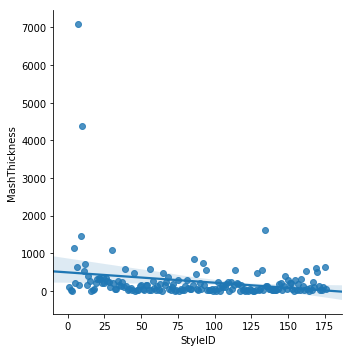

In [42]:
sns.lmplot(x = 'StyleID', y = 'MashThickness', data = beergroup)

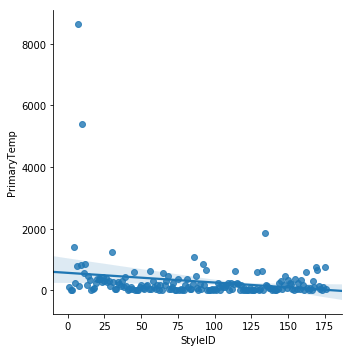

In [43]:
sns.lmplot(x = 'StyleID', y = 'PrimaryTemp', data = beergroup2)

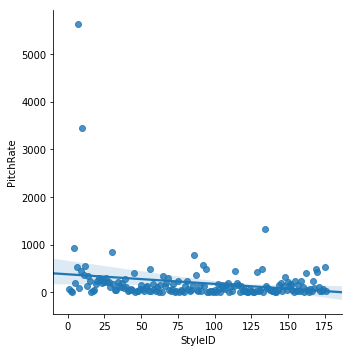

In [44]:
sns.lmplot(x = 'StyleID', y = 'PitchRate', data = beergroup3)

The available values for all of these seem to pretty consistent across styles. These columns could be useful. Let's do a correlation matrix to see if we actually need them.

In [45]:
beer.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,0.079123,-0.019661
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.026623,0.004278
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.020556,0.000518
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.013446,0.004477
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.132699,0.060065
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.006180,0.035510
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.016061,0.025622
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.030936,0.003000
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,0.190922,-0.079809
BoilGravity,0.002326,0.176071,0.968138,0.908611,0.025421,-0.007498,0.013451,0.175972,0.026921,1.000000,0.059132,0.050944,0.016216,0.002268


These 3 columns don't seem to correlated strongly with anything else. I'll keep them.

(0, 10)

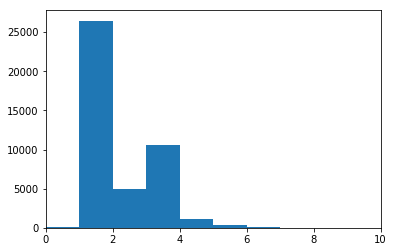

In [46]:
plt.hist(beer2['MashThickness'].dropna(),bins = 100)
plt.xlim(0,10)

{'boxes': [<matplotlib.lines.Line2D at 0x112a46320>],
 'caps': [<matplotlib.lines.Line2D at 0x112a46d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x112a4e9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112a4e5c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112a46470>,
  <matplotlib.lines.Line2D at 0x112a46908>]}

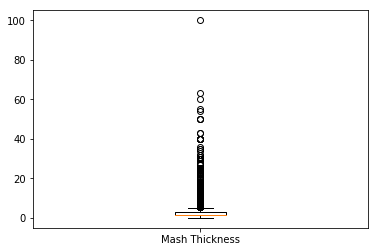

In [47]:
plt.boxplot(beer2['MashThickness'].dropna(), labels = ['Mash Thickness'])

MashThickness has a lot of really high outliers and the distribution is not normal. It probably makes more sense to replace nan values with the median than the mean.

In [48]:
np.median(beer2['MashThickness'].dropna())

1.5

The median for MashThickness is 1.5.

(array([4.4000e+01, 2.0000e+00, 3.0000e+00, 1.5000e+01, 3.5000e+01,
        5.0000e+00, 2.3000e+01, 5.0000e+00, 2.1000e+01, 1.0300e+02,
        2.0120e+03, 1.1590e+03, 2.2540e+03, 1.6954e+04, 2.2760e+04,
        4.5200e+03, 8.6600e+02, 1.3300e+02, 1.0000e+02, 6.0000e+00,
        1.6000e+01, 1.9000e+01, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        6.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        3.0000e+00, 5.5000e+01, 3.3000e+01, 1.8000e+01, 4.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-17.78  , -15.1444, -12.5088,  -9.8732,  -7.2376,  -4.602 ,
         -1.9664,   0.6692,   3.3048,   5.9404,   8.576 ,  11.2116,
         13.8472,  16.4828,  19.1184,  21.754 ,  24.3896,  27.0252,
         29.6608,  32.2964,  34.932 ,  37.5676,  40.2032,  42.8388,
         45.4744,  48.11  ,  50.7456,  53.3812

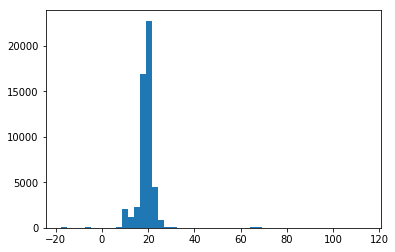

In [49]:
plt.hist(beer2['PrimaryTemp'].dropna(),bins = 50)


{'boxes': [<matplotlib.lines.Line2D at 0x1107a1198>],
 'caps': [<matplotlib.lines.Line2D at 0x1107a1ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1107a9860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1107a9438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1107a12e8>,
  <matplotlib.lines.Line2D at 0x1107a1780>]}

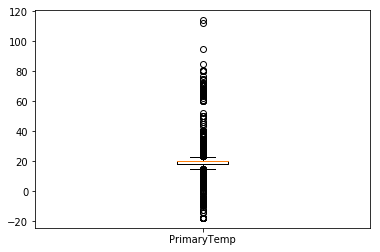

In [50]:
plt.boxplot(beer2['PrimaryTemp'].dropna(), labels = ['PrimaryTemp'])

In [51]:
np.median(beer2['PrimaryTemp'].dropna())

20.0

PrimaryTemp also has a lot of very high outliers. I'll replace nan values with the median.

(array([  51., 9477., 5469., 9002.,    0., 5194., 2405., 1838.,  533.,
         640.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

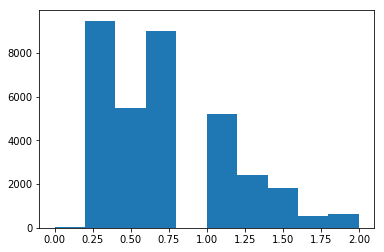

In [52]:
plt.hist(beer2['PitchRate'].dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x10f7e5da0>],
 'caps': [<matplotlib.lines.Line2D at 0x112ee7a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x112ef1c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112ef1908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f7e5ac8>,
  <matplotlib.lines.Line2D at 0x112ee7668>]}

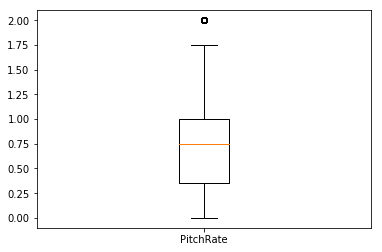

In [53]:
plt.boxplot(beer2['PitchRate'].dropna(), labels = ['PitchRate'])

In [54]:
np.median(beer2['PitchRate'].dropna())


0.75

In [55]:
np.mean(beer2['PitchRate'].dropna())

0.7504680863359242

I could use median or mean for PitchRate to replace the nan values.

In [56]:
beer2['PrimaryTemp2'] = beer2['PrimaryTemp'].fillna(20)

In [57]:
beer2['MashThickness2'] = beer2['MashThickness'].fillna(1.5)

In [58]:
beer2['PitchRate2'] = beer2['PitchRate'].fillna(0.75)

In [59]:
beer2 = beer2.drop(columns = ['MashThickness','PrimaryTemp','PitchRate'])

Finally I can drop all the empty fields from the 'kind' column I created and see how many rows I have left.

In [60]:
beer2.shape

(73861, 17)

In [61]:
beer3 = pd.DataFrame(beer2.dropna(how = 'any',axis = 0))

In [62]:
beer3.shape

(8272, 17)

In [63]:
beer3.tail()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,kind,PrimaryTemp2,MashThickness2,PitchRate2
BeerID,,,,,,,,,,,,,,,,,
73813,12,41.64,1.073,1.022,6.69,37.83,33.87,22.71,60,1.029,70.0,Specific Gravity,Partial Mash,Stout,20.00,1.5,0.50
73819,12,50.00,1.058,1.013,5.90,43.70,35.74,55.00,60,1.053,70.0,Specific Gravity,All Grain,Stout,18.00,3.1,0.75
73825,66,25.00,1.056,1.011,6.05,29.62,15.88,28.00,45,1.050,90.0,Specific Gravity,BIAB,Porter,20.00,1.5,0.75
73827,12,40.00,1.059,1.014,5.94,37.66,50.00,48.00,60,1.049,80.0,Specific Gravity,All Grain,Stout,20.00,4.0,0.75
73831,58,15.14,1.052,1.015,4.80,56.32,41.42,16.09,60,1.046,70.0,Specific Gravity,All Grain,Stout,21.67,1.4,1.00


In [64]:
beer3.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2
StyleID,1.000000,-0.000678,0.003635,0.019261,0.113884,0.021884,0.136905,-0.001785,0.044702,0.004461,-0.009100,0.020073,0.000985,0.005347
Size(L),-0.000678,1.000000,0.134396,0.128638,0.006521,-0.028578,-0.020190,0.998051,0.032566,0.146184,0.112839,0.008423,0.050712,0.030793
OG,0.003635,0.134396,1.000000,0.957533,0.048309,0.008494,0.004455,0.135965,0.040807,0.968755,0.067339,0.006246,0.050332,0.028186
FG,0.019261,0.128638,0.957533,1.000000,0.041012,0.005330,0.009356,0.129604,0.038854,0.934925,0.064280,0.010556,0.046304,0.019801
ABV,0.113884,0.006521,0.048309,0.041012,1.000000,0.459287,0.422525,0.011500,0.269595,0.040799,0.076666,-0.002396,-0.035200,0.235535
IBU,0.021884,-0.028578,0.008494,0.005330,0.459287,1.000000,0.199055,-0.027403,0.097073,0.004649,-0.020534,-0.011541,-0.021687,0.093434
Color,0.136905,-0.020190,0.004455,0.009356,0.422525,0.199055,1.000000,-0.016910,0.133306,0.002407,0.000662,0.028948,-0.013158,0.087214
BoilSize,-0.001785,0.998051,0.135965,0.129604,0.011500,-0.027403,-0.016910,1.000000,0.039577,0.146290,0.128209,0.007689,0.052815,0.032302
BoilTime,0.044702,0.032566,0.040807,0.038854,0.269595,0.097073,0.133306,0.039577,1.000000,0.034131,0.123803,-0.017634,0.026355,0.129440
BoilGravity,0.004461,0.146184,0.968755,0.934925,0.040799,0.004649,0.002407,0.146290,0.034131,1.000000,0.055041,0.008756,0.047562,0.021572


In [65]:
# BoilGravity , OG are very highly correlated with FG.
# BoilSize is too highly correlated with Size(L)
beer3 = pd.DataFrame(beer3.drop(columns = ['OG','BoilGravity','BoilSize']))

In [66]:
beer3.shape

(8272, 14)

In [67]:
beer3dum = pd.get_dummies(beer3.drop(columns = ['kind','StyleID']))

In [68]:
beer3dum.head()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
BeerID,,,,,,,,,,,,,,,,
9,22.71,1.016,5.77,31.63,34.76,75,73.0,20.00,1.5,0.75,0,1,1,0,0,0
30,50.00,1.014,5.76,39.00,38.71,60,71.0,18.00,1.5,0.75,0,1,1,0,0,0
47,20.00,1.019,5.21,37.34,42.09,90,75.0,19.00,1.5,0.75,0,1,1,0,0,0
59,20.00,1.025,9.67,69.25,50.00,90,65.0,18.00,1.5,1.00,0,1,1,0,0,0
63,20.82,1.015,6.06,34.61,40.00,90,70.0,19.44,1.5,0.75,0,1,1,0,0,0


In [69]:
beer3dum.corr()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
Size(L),1.000000,0.128638,0.006521,-0.028578,-0.020190,0.032566,0.112839,0.008423,0.050712,0.030793,0.126302,-0.126302,0.091855,-0.059424,-0.027443,-0.047832
FG,0.128638,1.000000,0.041012,0.005330,0.009356,0.038854,0.064280,0.010556,0.046304,0.019801,0.902991,-0.902991,0.070827,-0.035570,-0.021875,-0.048514
ABV,0.006521,0.041012,1.000000,0.459287,0.422525,0.269595,0.076666,-0.002396,-0.035200,0.235535,-0.002844,0.002844,0.051982,-0.008078,0.000499,-0.068276
IBU,-0.028578,0.005330,0.459287,1.000000,0.199055,0.097073,-0.020534,-0.011541,-0.021687,0.093434,-0.009877,0.009877,0.003244,-0.011460,0.008766,0.002709
Color,-0.020190,0.009356,0.422525,0.199055,1.000000,0.133306,0.000662,0.028948,-0.013158,0.087214,-0.023964,0.023964,0.050931,0.010827,-0.025316,-0.071372
BoilTime,0.032566,0.038854,0.269595,0.097073,0.133306,1.000000,0.123803,-0.017634,0.026355,0.129440,0.023109,-0.023109,0.146603,-0.030315,-0.069515,-0.135030
Efficiency,0.112839,0.064280,0.076666,-0.020534,0.000662,0.123803,1.000000,-0.047231,0.089060,0.096041,0.069036,-0.069036,0.468920,0.092619,-0.145276,-0.708958
PrimaryTemp2,0.008423,0.010556,-0.002396,-0.011541,0.028948,-0.017634,-0.047231,1.000000,0.008189,-0.092925,0.002816,-0.002816,-0.021331,-0.018819,0.005411,0.050346
MashThickness2,0.050712,0.046304,-0.035200,-0.021687,-0.013158,0.026355,0.089060,0.008189,1.000000,-0.003204,0.056086,-0.056086,0.187506,-0.120226,-0.061122,-0.095418
PitchRate2,0.030793,0.019801,0.235535,0.093434,0.087214,0.129440,0.096041,-0.092925,-0.003204,1.000000,0.014039,-0.014039,0.072423,-0.002716,-0.034238,-0.081275


In [70]:
#The Sugarscales are too strongly correlated with FG.
beer3dum = pd.DataFrame(beer3dum.drop(columns = ['SugarScale_Specific Gravity','SugarScale_Plato']))

In [71]:
#beer3dum = pd.DataFrame(beer3dum.drop(columns = ['BrewMethod_All Grain','BrewMethod_BIAB','BrewMethod_Partial Mash','BrewMethod_extract']))

In [72]:
beer3dum.shape

(8272, 14)

In [73]:
exes = beer3dum
columns = exes.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(exes)
scaled_df = pd.DataFrame(scaled_df, columns = columns)
scaled_df.columns


Index(['Size(L)', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency',
       'PrimaryTemp2', 'MashThickness2', 'PitchRate2', 'BrewMethod_All Grain',
       'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract'],
      dtype='object')

In [74]:
beer3['kind'].unique()

array(['Porter', 'Stout'], dtype=object)

In [75]:
y = np.ravel(beer3['kind'])
y = y.astype(str)
X = np.asarray(scaled_df)


In [76]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C = 1e6)


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

##Fit the model.
fit = lr.fit(X_train, Y_train)


In [79]:
# Display.


print('Coefficients') 
print(fit.coef_)
print('Intercepts')
print (fit.intercept_)
pred_y_sklearn = lr.predict(X_test)
pred_y_sklearn = lr.predict(X_train)
print('\n Percentage accuracy')
print('Test',lr.score(X_test, Y_test))
print('Train',lr.score(X_train, Y_train))


Coefficients
[[-0.44416775  0.86843094  0.5403141  45.81000798  4.31571381  0.46825965
   0.24423239  1.57774637  2.02983655 -0.19674521 -0.94268799 -0.8192175
  -0.71626217 -0.52912302]]
Intercepts
[-3.00729068]

 Percentage accuracy
Test 0.7093655589123867
Train 0.7350763185733716


In [ ]:
#freq = pd.DataFrame(beerna2['StyleID'].value_counts().reset_index())
#freqcut = pd.DataFrame(freq[freq['StyleID'] > 5])
#freqcut['index'].unique()

In [ ]:
#freqcut['index'].nunique()

In [ ]:
#beerna2cut = pd.DataFrame(beerna2.loc[beerna2['StyleID'].isin(freqcut['index'].unique())])
#beerna2cut['StyleID'].nunique()

In [81]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


In [82]:
rfc = ensemble.RandomForestClassifier(n_jobs = -1)
y = np.ravel(beer3['kind'])
X = pd.DataFrame(beer3dum)


In [83]:
cross_val_score(rfc,X,y,cv=5)

array([0.77039275, 0.74803625, 0.73035067, 0.71584039, 0.7267231 ])

In [84]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

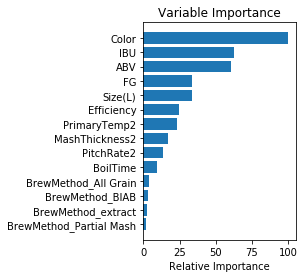

In [85]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [ ]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params,subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predict_train, normalize=True, sample_weight=None)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_test, normalize=True, sample_weight=None)